In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
order=pd.read_csv('Data/train1.csv')

In [4]:
order.describe()

region_id           slot            gap          order  \
count  199584.00000  199584.000000  199584.000000  199584.000000   
mean       33.50000      72.500000       7.598104      42.792078   
std        19.05042      41.568321      45.229539     103.652317   
min         1.00000       1.000000       0.000000       0.000000   
25%        17.00000      36.750000       0.000000       1.000000   
50%        33.50000      72.500000       1.000000       7.000000   
75%        50.00000     108.250000       3.000000      32.000000   
max        66.00000     144.000000    3872.000000    4362.000000   

              sumgap        WeekDay        Weather           Temp  \
count  199584.000000  199584.000000  199584.000000  199584.000000   
mean     1094.126984       3.000000       2.502024       5.367329   
std      3100.716422       2.000005       1.882603       3.955454   
min         8.000000       0.000000       0.000000       0.000000   
25%        73.000000       1.000000       2.000000       1.000000   
50%       155.000000       3.000000       2.000000       5.000000   
75%       697.000000       5.000000       4.000000       8.000000   
max     58704.000000       6.000000       9.000000      19.000000   

                PM25       POI_Sum  
count  199584.000000  1.995840e+05  
mean       97.471065  2.964874e+05  
std        64.411942  5.219022e+05  
min         6.000000  2.988000e+03  
25%        49.000000  5.079600e+04  
50%        98.000000  1.011770e+05  
75%       143.000000  2.546440e+05  
max       276.000000  3.340833e+06

In [5]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from collections import defaultdict

In [6]:
order=order[order.gap<1500]

In [7]:
od=np.array(order)
feat=[0,1,3,5,6,7,8,9]
#feat=[0,1,3,5]

X_train=od[:150000,feat]
y_train=od[:150000,2]
X_test=od[150000:,feat]
y_test=od[150000:,2]

In [8]:
for i in range(1,50):
    ada_1 = DecisionTreeRegressor(max_depth=i)
    ada_1.fit(X_train,y_train)
    y_1 = ada_1.predict(X_test)
    print i,  mean_absolute_error(y_test,y_1)

1 9.83992610148
2 7.66180760855
3 6.46703693555
4 5.45869895068
5 5.08570383493
6 4.71332690265
7 4.52704120727
8 4.43633597031
9 4.11931098375
10 3.87533663875
11 3.81456996727
12 3.66529141056
13 3.85338466813
14 3.71925812607
15 3.8272246435
16 3.91421879043
17 3.77435491117
18 3.8393847051
19 3.99338766164
20 3.95164827007
21 3.93240549232
22 3.96067679049
23 4.08076955973
24 4.13643856937
25 3.93138928093
26 4.12621808936
27 4.04227140346
28 4.03466025262
29 4.01305606982
30 4.07631268653
31 4.05758449854
32 3.98247438944
33 4.14205110528
34 4.04104937734
35 3.98066492609
36 4.02282556525
37 4.10074032235
38 4.13622334739
39 4.06760736691
40 4.14987997499
41 4.19047667077
42 4.06812175983
43 4.02838238557
44 4.03603776249
45 4.00463962238
46 4.01763056503
47 3.99573356464
48 4.16437375184
49 4.11010025619


In [9]:
ada_1 = DecisionTreeRegressor(max_depth=25)
ada_2 = ensemble.AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300)

In [10]:
ada_1.fit(X_train,y_train)
ada_2.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=None)

In [11]:
y_1 = ada_1.predict(X_test)
y_2 = ada_2.predict(X_test)

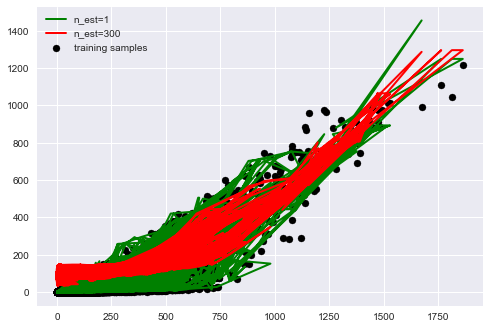

In [12]:
plt.figure()
plt.scatter(X_test[:,2],y_test,c='k',label='training samples')
plt.plot(X_test[:,2],y_1,c='g',label='n_est=1',linewidth=2)
plt.plot(X_test[:,2],y_2,c='r',label='n_est=300',linewidth=2)
plt.legend()
plt.show()

In [13]:
mean_absolute_error(y_test,y_1)

3.9653120157518762

In [14]:
mean_absolute_error(y_test,y_2)

89.226795849241768